# Analysis of the evolution along time

We will try to see if the overall scores of the beers evolve along the year and if there is a variation of this variation depending on the climate.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from data_loader import (
    get_users_df,
    get_reviews_df,
    get_beers_df,
    get_breweries_df,
    join_breweries_on_beers,
    merge_reviews,
)

In [6]:
us_users_ratings_time = pd.read_csv("../data/us_users_ratings.csv", compression="gzip")

/var/folders/0g/yd41q8010pn2lvl2qx960v240000gn/T/ipykernel_45687/3643569898.py:1: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  us_users_ratings_time = pd.read_csv("../data/us_users_ratings.csv", compression="gzip")


In [7]:
us_users_ratings_time = us_users_ratings_time.dropna(subset=["overall"])

# Intrayear evolution of the mean ratings

We also wanted to investigate how the appreciation of beer might evolve over time. To do so, we plotted the mean rating of beers as a function of the month of the year.

First, we plot the overall mean using the full dataset.

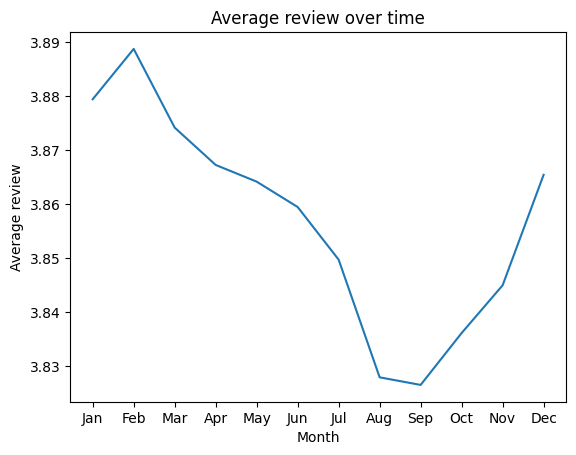

In [8]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# evolution of the average reviews over time: convert date in unix to datetime
us_users_ratings_time["date"] = pd.to_datetime(us_users_ratings_time["date"], unit="s")
us_users_ratings_time["year"] = us_users_ratings_time["date"].dt.year
us_users_ratings_time["month"] = us_users_ratings_time["date"].dt.month
# plot average review over time but keep only month that have enough reviews
us_users_ratings_time.groupby("month")["overall"].mean().plot()
plt.xlabel("Month")
plt.ylabel("Average review")
plt.title("Average review over time")
plt.xticks(np.arange(1, 13, 1), months)
plt.show()

It appears that generally in the U.S., there is a variation of the appreciation of beer along the year, let's plot the same for each climate.

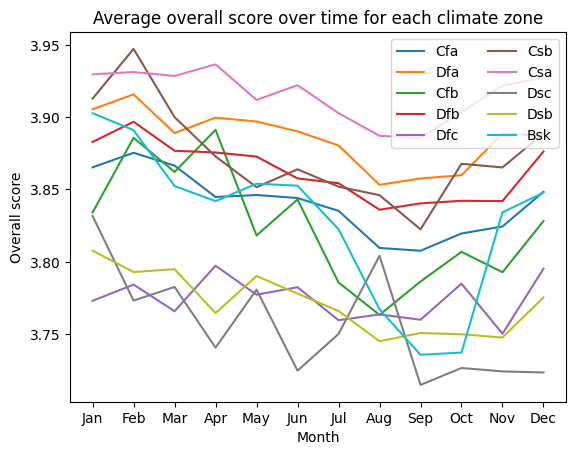

In [9]:
# repeat the above for each climate zone
for zone in us_users_ratings_time["climate"].unique():
    us_users_ratings_time[us_users_ratings_time["climate"] == zone].groupby("month")[
        "overall"
    ].mean().plot(label=zone)

plt.xticks(range(1, 13), months)
plt.xlabel("Month")
plt.ylabel("Overall score")
plt.legend(loc="upper right", ncol=2)
plt.title("Average overall score over time for each climate zone")
plt.show()

It is hard to see if the variations for each climate are different, we plot the difference in between months for each climate.

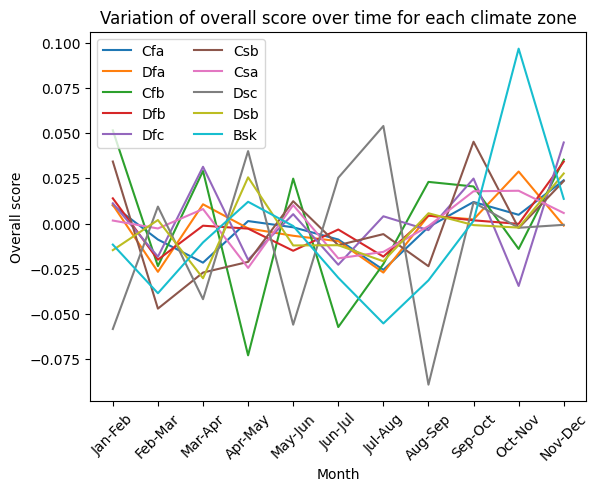

The p-value for the variation is 0.9981700383514995


In [10]:
rating_along_year = np.zeros((12, len(us_users_ratings_time["climate"].unique())))
for i, zone in enumerate(us_users_ratings_time["climate"].unique()):
    rating_along_year[:, i] = us_users_ratings_time[us_users_ratings_time["climate"] == zone].groupby("month")[
        "overall"
    ].mean()
    
variation_along_year = np.diff(rating_along_year, axis=0)
plt.plot(variation_along_year)
plt.title("Variation of overall score over time for each climate zone")
plt.xlabel("Month")
plt.ylabel("Overall score")
plt.xticks(range(11), [months[i] + "-" + months[i+1] for i in range(11)], rotation=45)
plt.legend(us_users_ratings_time["climate"].unique(), loc="upper left", ncol=2)
plt.show()
    
# Perform one-way ANOVA between the climate zones
res = stats.f_oneway(*[variation_along_year[:, i] for i in range(len(us_users_ratings_time["climate"].unique()))])
print("The p-value for the variation is {}".format(res.pvalue))

It appears that there are no statistically significant differences between the climates. We therefore will now look at various sub-categories of climate.

First, let's separate the climates by their scheme.

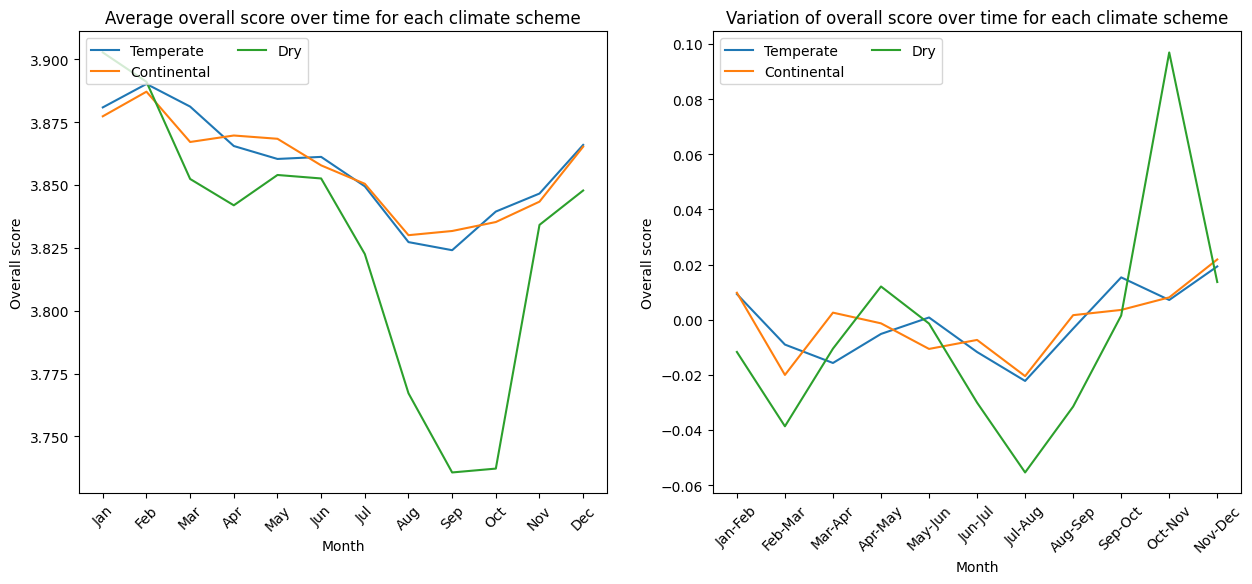

The p-value is 0.9232175462241221


In [11]:
rating_along_year_schemes = np.zeros((12, len(us_users_ratings_time["climate_scheme"].unique())))
for i, climate_scheme in enumerate(us_users_ratings_time["climate_scheme"].unique()):
    rating_along_year_schemes[:, i] = us_users_ratings_time[us_users_ratings_time["climate_scheme"] == climate_scheme].groupby("month")[
        "overall"
    ].mean()
    
variation_along_year_schemes = np.diff(rating_along_year_schemes, axis=0)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(rating_along_year_schemes)
axs[0].set_title("Average overall score over time for each climate scheme")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Overall score")
axs[0].set_xticks(range(12))
axs[0].set_xticklabels(months, rotation=45)
axs[0].legend(us_users_ratings_time["climate_scheme"].unique(), loc="upper left", ncol=2)

axs[1].plot(variation_along_year_schemes)
axs[1].set_title("Variation of overall score over time for each climate scheme")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Overall score")
axs[1].set_xticks(range(11))
axs[1].set_xticklabels([months[i] + "-" + months[i+1] for i in range(11)], rotation=45)
axs[1].legend(us_users_ratings_time["climate_scheme"].unique(), loc="upper left", ncol=2)

plt.show()


# Perform one-way ANOVA between the climate zones
res = stats.f_oneway(*[variation_along_year_schemes[:, i] for i in range(len(us_users_ratings_time["climate_scheme"].unique()))])
print("The p-value is {}".format(res.pvalue))

Let's now do the same but looking at the precipitation.

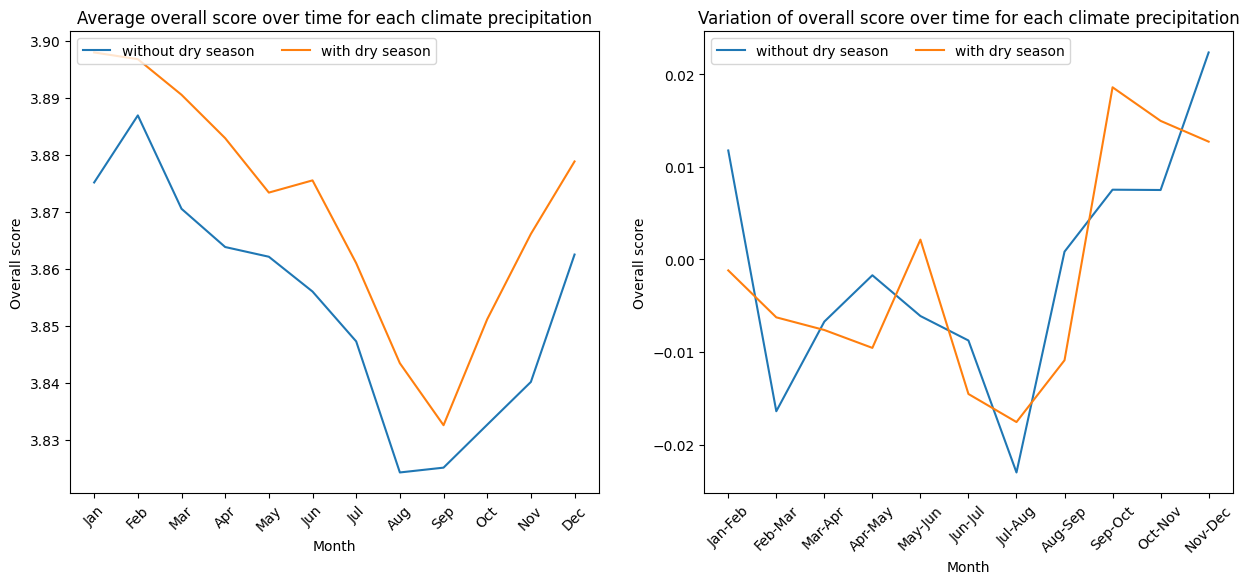

The p-value is 0.9145164854888385


In [12]:
rating_along_year_precipitation = np.zeros((12, len(us_users_ratings_time["climate_precipitation"].unique())))

for i, climate_precipitation in enumerate(us_users_ratings_time["climate_precipitation"].unique()):
    rating_along_year_precipitation[:, i] = us_users_ratings_time[us_users_ratings_time["climate_precipitation"] == climate_precipitation].groupby("month")[
        "overall"
    ].mean()
    
variation_along_year_precipitation = np.diff(rating_along_year_precipitation, axis=0)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(rating_along_year_precipitation)
axs[0].set_title("Average overall score over time for each climate precipitation")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Overall score")
axs[0].set_xticks(range(12))
axs[0].set_xticklabels(months, rotation=45)
axs[0].legend(us_users_ratings_time["climate_precipitation"].unique(), loc="upper left", ncol=2)

axs[1].plot(variation_along_year_precipitation)
axs[1].set_title("Variation of overall score over time for each climate precipitation")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Overall score")
axs[1].set_xticks(range(11))
axs[1].set_xticklabels([months[i] + "-" + months[i+1] for i in range(11)], rotation=45)
axs[1].legend(us_users_ratings_time["climate_precipitation"].unique(), loc="upper left", ncol=2)

plt.show()

# Perform one-way ANOVA between the climate zones
res = stats.f_oneway(*[variation_along_year_precipitation[:, i] for i in range(len(us_users_ratings_time["climate_precipitation"].unique()))])
print("The p-value is {}".format(res.pvalue))

Finally, we can look at the temperature.

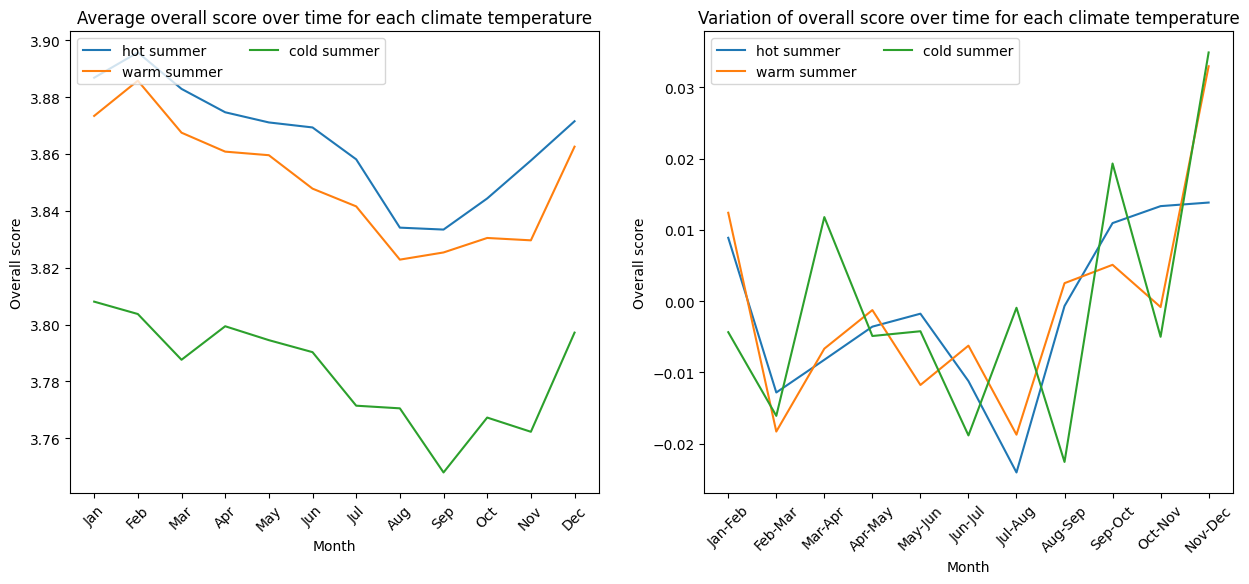

The p-value is 0.9972688198025134


In [13]:
rating_along_year_temperature = np.zeros((12, len(us_users_ratings_time["climate_temperature"].unique())))
for i, climate_temperature in enumerate(us_users_ratings_time["climate_temperature"].unique()):
    rating_along_year_temperature[:, i] = us_users_ratings_time[us_users_ratings_time["climate_temperature"] == climate_temperature].groupby("month")[
        "overall"
    ].mean()
    
variation_along_year_temperature = np.diff(rating_along_year_temperature, axis=0)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(rating_along_year_temperature)
axs[0].set_title("Average overall score over time for each climate temperature")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Overall score")
axs[0].set_xticks(range(12))
axs[0].set_xticklabels(months, rotation=45)
axs[0].legend(us_users_ratings_time["climate_temperature"].unique(), loc="upper left", ncol=2)

axs[1].plot(variation_along_year_temperature)
axs[1].set_title("Variation of overall score over time for each climate temperature")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Overall score")
axs[1].set_xticks(range(11))
axs[1].set_xticklabels([months[i] + "-" + months[i+1] for i in range(11)], rotation=45)
axs[1].legend(us_users_ratings_time["climate_temperature"].unique(), loc="upper left", ncol=2)

plt.show()

# Perform one-way ANOVA between the climate zones
res = stats.f_oneway(*[variation_along_year_temperature[:, i] for i in range(len(us_users_ratings_time["climate_temperature"].unique()))])
print("The p-value is {}".format(res.pvalue))

For all of these sub-categories, we can see that there is no statistically significant difference between the climates, indeed the difference is always in the same order of magnitude and in the same direction.